# Clase 9 - ICDP
En esta clase vamos a desarrollar un proyecto que combinará todo lo aprendido en las semanas anteriores, además de presentar nuevos conceptos claves en su camino a la ciencia de datos.

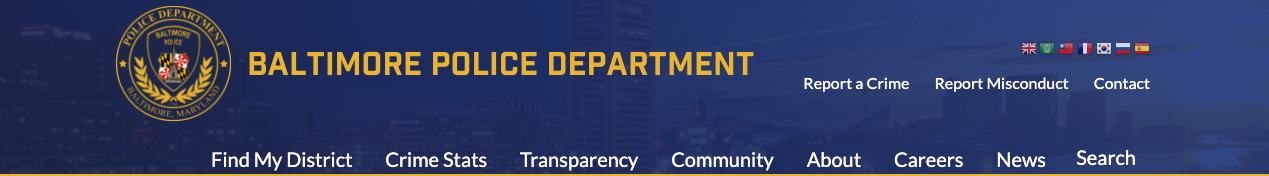

Diccionario de datos:
* NAME: Nombre de la persona
* JOBTITLE: Cargo de la persona
* DEPTID: ID del departamento
* DESCR: Descripción del departamentop
* HIRE_DT: Fecha de contratación
* ANNUAL_RT: Salario anual
* GROSS: Salario Bruto

# **imports**

In [2]:
import seaborn as sns
import missingno as msno
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [3]:
is_outlier = lambda p: (stats.zscore(p) > 3) | (stats.zscore(p) < -3)

In [4]:
df = pd.read_csv("Baltimore_City_Employee_Salaries_FY2018.csv").reset_index()
df.rename(columns={"index":"ID"}, inplace=True)

In [5]:
df.shape 

(13683, 8)

In [6]:
df.head()

ID                   NAME                       JOBTITLE  DEPTID  \
0   0       Aaron,Patricia G  Facilities/Office Services II  A03031   
1   1          Aaron,Petra L     Assistant State's Attorney  A29045   
2   2          Abadir,Adam O             Council Technician  A02002   
3   3  Abaku,Aigbolosimuan O         Police Officer Trainee  A99416   
4   4          Abbeduto,Mack                  Law Clerk SAO  A29017   

                           DESCR                 HIRE_DT  ANNUAL_RT     GROSS  
0       OED-Employment Dev (031)  10/24/1979 12:00:00 AM    60200.0  58480.46  
1  States Attorneys Office (045)  09/25/2006 12:00:00 AM    81200.0  79220.72  
2             City Council (002)  12/12/2016 12:00:00 AM    64823.0  57375.31  
3        Police Department (416)  04/17/2018 12:00:00 AM    50440.0  11881.34  
4  States Attorneys Office (017)  05/22/2017 12:00:00 AM    38926.0  35138.40

In [7]:
df.tail()

ID                  NAME                     JOBTITLE  DEPTID  \
13678  13678       Zorzi,Matthew J         Recreation Leader II  A04009   
13679  13679           Zou,Zhi Fan                 Police Cadet  A99416   
13680  13680  Zovistoski,Zachary D               Police Officer  A99006   
13681  13681     Zuhoski,Timothy C       Police Officer Trainee  A99261   
13682  13682        Zuniga,Linette  Grant Services Specialist I  A65527   

                              DESCR                 HIRE_DT  ANNUAL_RT  \
13678          R&P-Recreation (009)  07/07/2016 12:00:00 AM    33199.0   
13679       Police Department (416)  04/11/2018 12:00:00 AM    31388.0   
13680       Police Department (006)  12/17/2013 12:00:00 AM    64556.0   
13681       Police Department (261)  01/31/2017 12:00:00 AM    50561.0   
13682  HLTH-Health Department (527)  10/20/2016 12:00:00 AM    29129.0   

          GROSS  
13678  34888.80  
13679   7650.19  
13680  75743.78  
13681  60078.31  
13682  22817.57

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13683 entries, 0 to 13682
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         13683 non-null  int64  
 1   NAME       13683 non-null  object 
 2   JOBTITLE   13683 non-null  object 
 3   DEPTID     13683 non-null  object 
 4   DESCR      13683 non-null  object 
 5   HIRE_DT    13680 non-null  object 
 6   ANNUAL_RT  13683 non-null  float64
 7   GROSS      13522 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 855.3+ KB


In [9]:
df.describe()

ID      ANNUAL_RT          GROSS
count  13683.000000   13683.000000   13522.000000
mean    6841.000000   56751.774026   60729.312142
std     3950.086202   25491.250161   36197.335957
min        0.000000    1800.000000       0.000000
25%     3420.500000   36399.500000   37509.352500
50%     6841.000000   52456.000000   57060.665000
75%    10261.500000   73440.000000   81730.975000
max    13682.000000  250000.000000  250197.500000

In [9]:
df.describe(include='all')

ID           NAME        JOBTITLE  DEPTID  \
count   13683.000000          13683           13683   13683   
unique           NaN          13472            1012     673   
top              NaN  Thomas,Stacey  Police Officer  C90786   
freq             NaN              3            1423     230   
mean     6841.000000            NaN             NaN     NaN   
std      3950.086202            NaN             NaN     NaN   
min         0.000000            NaN             NaN     NaN   
25%      3420.500000            NaN             NaN     NaN   
50%      6841.000000            NaN             NaN     NaN   
75%     10261.500000            NaN             NaN     NaN   
max     13682.000000            NaN             NaN     NaN   

                               DESCR                 HIRE_DT      ANNUAL_RT  \
count                          13683                   13680   13683.000000   
unique                           672                    4636            NaN   
top     R&P-Recreation (part-time) (  06/23/2007 12:00:00 AM            NaN   
freq                             330                      78            NaN   
mean                             NaN                     NaN   56751.774026   
std                              NaN                     NaN   25491.250161   
min                              NaN                     NaN    1800.000000   
25%                              NaN                     NaN   36399.500000   
50%                              NaN                     NaN   52456.000000   
75%                              NaN                     NaN   73440.000000   
max                              NaN                     NaN  250000.000000   

                GROSS  
count    13522.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean     60729.312142  
std      36197.335957  
min          0.000000  
25%      37509.352500  
50%      57060.665000  
75%      81730.975000  
max     250197.500000

In [10]:
df.describe(include='object')

NAME        JOBTITLE  DEPTID                         DESCR  \
count           13683           13683   13683                         13683   
unique          13472            1012     673                           672   
top     Thomas,Stacey  Police Officer  C90786  R&P-Recreation (part-time) (   
freq                3            1423     230                           330   

                       HIRE_DT  
count                    13680  
unique                    4636  
top     06/23/2007 12:00:00 AM  
freq                        78

In [11]:
df.HIRE_DT = pd.to_datetime(df.HIRE_DT)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13683 entries, 0 to 13682
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         13683 non-null  int64         
 1   NAME       13683 non-null  object        
 2   JOBTITLE   13683 non-null  object        
 3   DEPTID     13683 non-null  object        
 4   DESCR      13683 non-null  object        
 5   HIRE_DT    13680 non-null  datetime64[ns]
 6   ANNUAL_RT  13683 non-null  float64       
 7   GROSS      13522 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 855.3+ KB


## missing values

En esta sección veremos algunos enfoques para lidiar con los valores perdidos.

Luego, vamos a comparar la efectividad de estos enfoques en un conjunto de datos del mundo real.

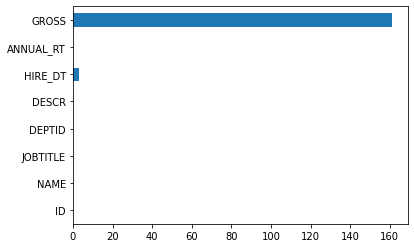

In [13]:
df.isnull().sum().plot(kind="barh")

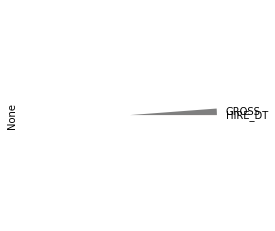

In [14]:
(df.isnull().sum()/len(df)).plot(kind="pie")

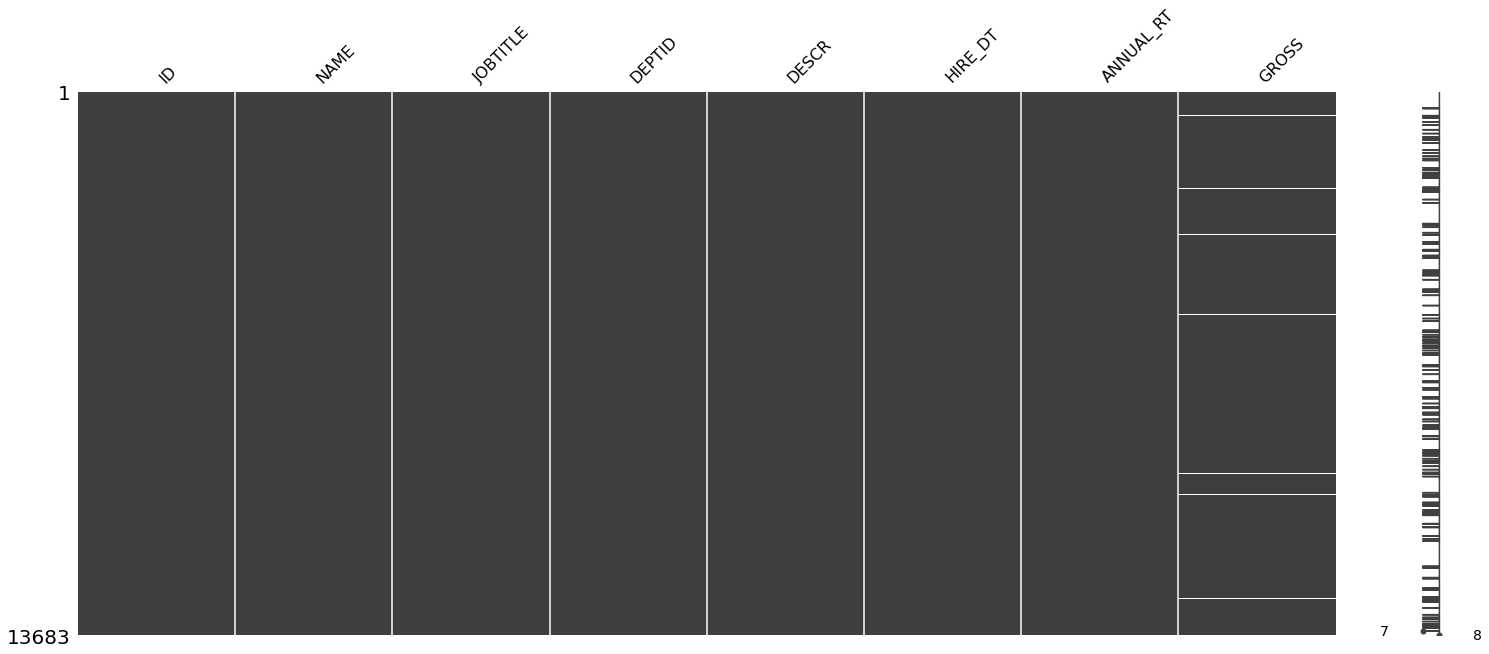

In [15]:
msno.matrix(df)

In [16]:
df.isna()

ID   NAME  JOBTITLE  DEPTID  DESCR  HIRE_DT  ANNUAL_RT  GROSS
0      False  False     False   False  False    False      False  False
1      False  False     False   False  False    False      False  False
2      False  False     False   False  False    False      False  False
3      False  False     False   False  False    False      False  False
4      False  False     False   False  False    False      False  False
...      ...    ...       ...     ...    ...      ...        ...    ...
13678  False  False     False   False  False    False      False  False
13679  False  False     False   False  False    False      False  False
13680  False  False     False   False  False    False      False  False
13681  False  False     False   False  False    False      False  False
13682  False  False     False   False  False    False      False  False

[13683 rows x 8 columns]

In [17]:
df["GROSS"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
13678    False
13679    False
13680    False
13681    False
13682    False
Name: GROSS, Length: 13683, dtype: bool

### imputation `fillna()`

`fillna()` completa los valores faltantes con algún número.

Por ejemplo, podemos completar el valor promedio a lo largo de cada columna.

En este caso, vamos a utilizar el valor promedio para realizar la sustitución. 

!["imputation"](https://imgshare.org/i/LMw63372.png)

In [18]:
df["GROSS"] = df["GROSS"].fillna(np.mean(df["GROSS"]))

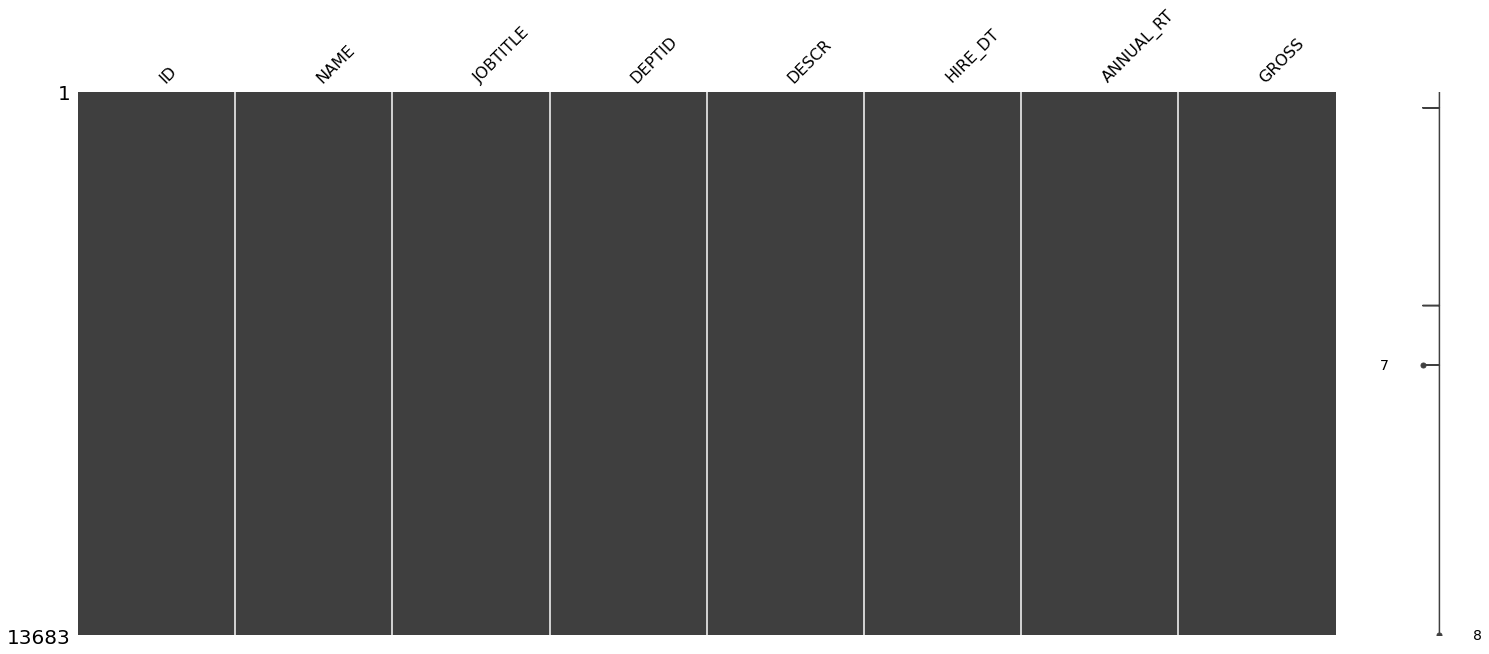

In [19]:
msno.matrix(df)

### drop values `dropna()`

La opción más simple es eliminar columnas con valores perdidos

!["drop value"](https://imgshare.org/i/yQHB3373.png)

A menos que falten la mayoría de los valores en las columnas eliminadas, el modelo pierde acceso a mucha información (¡potencialmente útil!)}
<br>

<br>
Con este enfoque, como ejemplo extremo, consideremos un conjunto de datos con 10.000 filas, donde a una columna importante le falta una sola entrada. ¡Este enfoque eliminaría la columna por completo!

In [20]:
df.isna().sum()

ID           0
NAME         0
JOBTITLE     0
DEPTID       0
DESCR        0
HIRE_DT      3
ANNUAL_RT    0
GROSS        0
dtype: int64

In [21]:
df[df["HIRE_DT"].isna()]

ID                 NAME                      JOBTITLE  DEPTID  \
404    404        Artis,Caira J              EMT Fire Fighter  A64003   
5382  5382  Harrod Jr,Kenneth W  Emergency Medical Technician  A64462   
6880  6880        Kerr,Justin T    Firefighter Paramedic Supp  A64130   

                      DESCR HIRE_DT  ANNUAL_RT     GROSS  
404   Fire Department (003)     NaT    38066.0  20175.14  
5382  Fire Department (462)     NaT    33626.0  35579.98  
6880  Fire Department (130)     NaT    42289.0  48360.67

In [22]:
df = df.dropna()

In [23]:
df.isna().sum()

ID           0
NAME         0
JOBTITLE     0
DEPTID       0
DESCR        0
HIRE_DT      0
ANNUAL_RT    0
GROSS        0
dtype: int64

# **Análisis de datos**

### total pago en el año 2018

In [24]:
'${:,.2f}'.format(df['ANNUAL_RT'].sum())

'$776,420,543.00'

### Pago anual promedio en el gobierno de la ciudad de Baltimore

In [25]:
'${:,.2f}'.format(df['ANNUAL_RT'].mean())

'$56,755.89'

### Pago anual máximo en el gobierno de la ciudad de Baltimore

In [26]:
'${:,.2f}'.format(df['ANNUAL_RT'].max())

'$250,000.00'

### Pago anual mínimo en el gobierno de la ciudad de Baltimore

In [27]:
'${:,.2f}'.format(df['ANNUAL_RT'].min())

'$1,800.00'

### Detalles del empleado con el salario anual más alto en el gobierno de la ciudad de Baltimore

In [28]:
df[df['ANNUAL_RT']== df['ANNUAL_RT'].max()] 

ID             NAME                JOBTITLE  DEPTID  \
6446  6446  Johnson,Frank A  Executive Director III  A40001   

                          DESCR    HIRE_DT  ANNUAL_RT      GROSS  
6446  M-R Info Technology (001) 2017-09-01   250000.0  217305.97

### Detalles del empleado con el salario bruto más bajo en el gobierno de la ciudad de Baltimore

In [29]:
df[df['GROSS']== df['GROSS'].min()] 

ID              NAME                      JOBTITLE  DEPTID  \
2568    2568   Collins,Bryan M   EMT Firefighter Suppression  A64MIL   
5937    5937    Howe II,John L        Police Officer Trainee  A99MIL   
10429  10429  Rodriguez,Juan C   EMT Firefighter Suppression  A64MIL   
11593  11593   Starrs,Thomas D  Fire Emergency Veh Drvr Supp  A64MIL   

                         DESCR    HIRE_DT  ANNUAL_RT  GROSS  
2568     Fire Department (MIL) 2007-10-23    68608.0    0.0  
5937   Police Department (MIL) 2015-01-20    60732.0    0.0  
10429    Fire Department (MIL) 2011-01-19    66310.0    0.0  
11593    Fire Department (MIL) 2011-07-06    67818.0    0.0

### Salario promedio anual y salario bruto promedio por puesto de trabajo en el gobierno de la ciudad de Baltimore

In [30]:
df.groupby('JOBTITLE').mean()[['ANNUAL_RT','GROSS']]

ANNUAL_RT         GROSS
JOBTITLE                                              
911 Lead Operator           59580.800000  65315.632000
911 Operator                51273.493827  47329.774321
911 Operator Supervisor     66537.000000  72514.987500
ADM Coordinator             55512.000000  56502.080000
Account Executive           60700.000000  46141.008000
...                                  ...           ...
Zoning Administrator        98700.000000  93562.900000
Zoning Appeals Officer      74100.000000  57050.135000
Zoning Enforcement Officer  70600.000000  70028.640000
Zoning Examiner I           49097.000000  49009.590000
Zoning Examiner II          59587.000000  60613.170000

[1012 rows x 2 columns]

### Número de puestos de trabajo únicos en el gobierno de la ciudad de Baltimore

In [31]:
df['JOBTITLE'].nunique()

1012

### Número de departamentos del gobierno de la ciudad de Baltimore

In [32]:
df['DEPTID'].nunique()

673

### Recuento de empleados por puesto de trabajo en el gobierno de la ciudad de Baltimore

In [33]:
df['JOBTITLE'].value_counts()

Police Officer                  1423
Laborer Hourly                   522
Recreation Arts Instructor       381
EMT Firefighter Suppression      351
Crossing Guard                   287
                                ... 
Graphic Artist Supervisor          1
Inspection Associate Supv          1
Fire Captain OEM ALS               1
DPW Safety Training Manager        1
Utility Meter Reader Supt II       1
Name: JOBTITLE, Length: 1012, dtype: int64

### Diez trabajos más comunes en el gobierno de la ciudad de Baltimore

In [34]:
df['JOBTITLE'].value_counts().head(10)

Police Officer                   1423
Laborer Hourly                    522
Recreation Arts Instructor        381
EMT Firefighter Suppression       351
Crossing Guard                    287
Office Support Specialist III     280
Police Officer Trainee            280
Police Officer EID                278
Police Sergeant                   234
Community Aide                    224
Name: JOBTITLE, dtype: int64

### Diez trabajos menos comunes en el gobierno de la ciudad de Baltimore

In [35]:
df['JOBTITLE'].value_counts().tail(10)

Public Health Rep Supervisor      1
IT Manager BCIT                   1
Supervisor of Administration C    1
Office Sys Analyst Prgmr Supv     1
Legislative Fiscal Analyst        1
Graphic Artist Supervisor         1
Inspection Associate Supv         1
Fire Captain OEM ALS              1
DPW Safety Training Manager       1
Utility Meter Reader Supt II      1
Name: JOBTITLE, dtype: int64

## Ejercicios

### Salario bruto promedio en el gobierno de la ciudad de Baltimore

In [36]:
'${:,.2f}'.format(df['GROSS'].mean())

'$60,735.02'

### Pago bruto máximo en el gobierno de la ciudad de Baltimore

In [37]:
'${:,.2f}'.format(df['GROSS'].max())

'$250,197.50'

### Pago bruto mínimo en el gobierno de la ciudad de Baltimore

In [38]:
'${:,.2f}'.format(df['GROSS'].min())

'$0.00'

### Detalles del empleado con el salario bruto más alto en el gobierno de la ciudad de Baltimore

In [39]:
df[df['GROSS']== df['GROSS'].max()] 

ID               NAME         JOBTITLE  DEPTID  \
5311  5311  Harris Jr,William  Police Sergeant  A99304   

                        DESCR    HIRE_DT  ANNUAL_RT     GROSS  
5311  Police Department (304) 2000-10-24   100228.0  250197.5

### Detalles del empleado con el salario anual más bajo en el gobierno de la ciudad de Baltimore

In [40]:
df[df['ANNUAL_RT']== df['ANNUAL_RT'].min()] 

ID             NAME                     JOBTITLE  DEPTID  \
6708  6708  Jones,Shirley B  Retired Judge Orphans Court  A37002   

                     DESCR    HIRE_DT  ANNUAL_RT    GROSS  
6708  Orphan's Court (002) 1985-06-27     1800.0  1799.98

### Salario anual promedio y salario bruto promedio por departamento en el gobierno de la ciudad de Baltimore

In [41]:
df.groupby('DEPTID').mean()[['ANNUAL_RT','GROSS']]

ANNUAL_RT         GROSS
DEPTID                            
A01001  77254.377551  63466.063105
A01020  99844.200000  96854.556000
A01030  87899.100000  41492.492000
A02001  73267.466667  73023.421333
A02002  48125.622222  35703.656667
...              ...           ...
C90SUM  23891.916667  11802.302693
P04001  25117.563218  11410.792668
P04002  21715.371795   8949.676122
P83004  20800.000000   1076.737500
SCS066  14161.333333   8776.873333

[673 rows x 2 columns]

### Lista de títulos de trabajo únicos en el gobierno de la ciudad de Baltimore

In [42]:
df['JOBTITLE'].unique()

array(['Facilities/Office Services II', "Assistant State's Attorney",
       'Council Technician', ..., 'Lactation Technician',
       'President City Council', 'Deputy Administrator Courts'],
      dtype=object)

### Lista de departamentos únicos en el gobierno de la ciudad de Baltimore

In [43]:
df['DESCR'].unique()

array(['OED-Employment Dev (031)', 'States Attorneys Office (045)',
       'City Council (002)', 'Police Department (416)',
       'States Attorneys Office (017)', 'R&P-Administration (012)',
       'TRANS-Traffic (005)', 'Fire Department (120)',
       'Police Department (160)', "Sheriff's Office (410)",
       'R&P-Recreation (part-time) (', 'DPW-Water & Waste Water (101)',
       'DPW-Solid Waste (105)', 'HLTH-Health Department (028)',
       'Housing & Community Dev (004)', 'Fire Department (604)',
       'Enoch Pratt Free Library (055)', 'OED-Employment Dev (092)',
       'COMP-Audits (002)', 'General Services (301)',
       'TRANS-Highways (102)', 'DPW-Solid Waste (wkly) (357)',
       'DPW-Water & Waste Water (100)', 'Housing & Community Dev (014)',
       'General Services (604)', 'Police Department (034)',
       'States Attorneys Office (008)', 'FIN-Collections (003)',
       'R&P-Recreation (001)', 'HR-Test Monitor (004)',
       'HLTH-Health Department (102)', 'TRANS-Highwa

### Recuento de empleados por departamento en el gobierno de la ciudad de Baltimore

In [44]:
df['DEPTID'].value_counts()

C90786    230
A99416    200
P04001    174
P04002    156
A85301    144
         ... 
A33001      1
A90042      1
B49999      1
A50210      1
A75085      1
Name: DEPTID, Length: 673, dtype: int64

### Diez departamentos principales por número de empleados en el gobierno de la ciudad de Baltimore

In [45]:
df['DEPTID'].value_counts().head(10)

C90786    230
A99416    200
P04001    174
P04002    156
A85301    144
A99386    119
A90201    118
A50207    103
A38001    103
A50209    103
Name: DEPTID, dtype: int64

### Los diez últimos departamentos por número de empleados en el gobierno de la ciudad de Baltimore

In [46]:
df['DEPTID'].value_counts().tail(10)

A99381    1
B70104    1
A65097    1
A99197    1
A75       1
A33001    1
A90042    1
B49999    1
A50210    1
A75085    1
Name: DEPTID, dtype: int64

# **Analizando variables categóricas**

## `NAME`

In [47]:
len(df["NAME"].unique())

13469

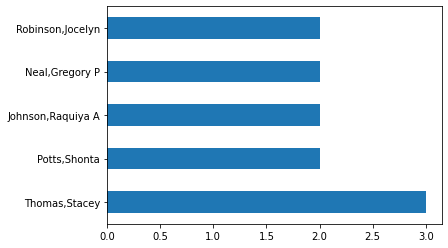

In [48]:
df["NAME"].value_counts().sort_values(ascending=False).head().plot(kind="barh")

## todas las columnas

columna NAME tiene 13469 valores unicos



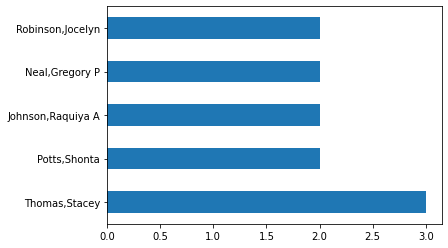


columna JOBTITLE tiene 1012 valores unicos



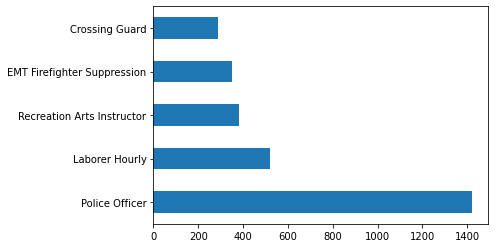


columna DEPTID tiene 673 valores unicos



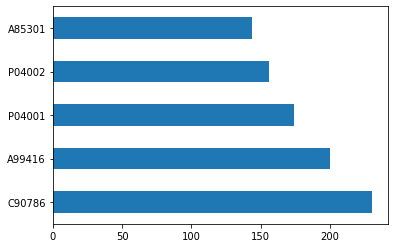


columna DESCR tiene 672 valores unicos



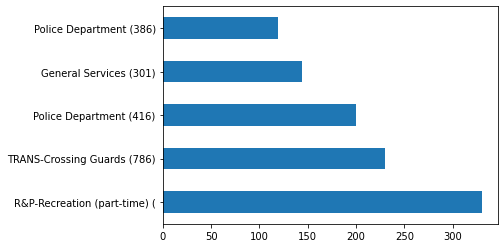

In [49]:
objetos = df.select_dtypes("object").columns.values

for column in objetos:
    print(f"columna {column} tiene {len(df[column].unique())} valores unicos\n")
    df[column].value_counts().sort_values(ascending=False).head().plot(kind="barh")
    plt.show()
    print("================\n")

# **Usando algunos plots**

## `TITLE`

### count plot

In [50]:
gp = df["JOBTITLE"].value_counts()

In [51]:
gp = df.groupby(["JOBTITLE"])["ID"].count()

In [52]:
gp.sort_values(ascending=False).head(15)

JOBTITLE
Police Officer                   1423
Laborer Hourly                    522
Recreation Arts Instructor        381
EMT Firefighter Suppression       351
Crossing Guard                    287
Police Officer Trainee            280
Office Support Specialist III     280
Police Officer EID                278
Police Sergeant                   234
Community Aide                    224
Assistant State's Attorney        158
Solid Waste Worker                147
Firefighter Paramedic Supp        140
Office Support Specialist II      133
Motor Vehicle Driver I Hourly     127
Name: ID, dtype: int64

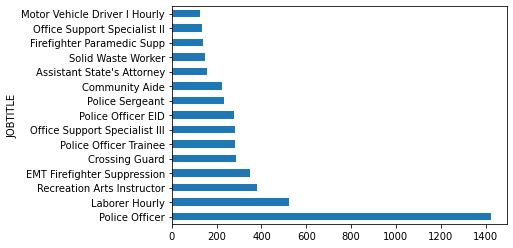

In [53]:
gp.sort_values(ascending=False).head(15).plot(kind="barh");

### pie chart

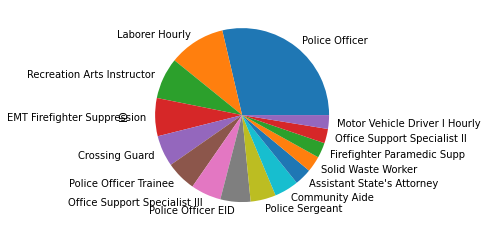

In [54]:
gp.sort_values(ascending=False).head(15).plot(kind="pie");

## Salary (`ANNUAL_RT` & `GROSS`)

### histogram

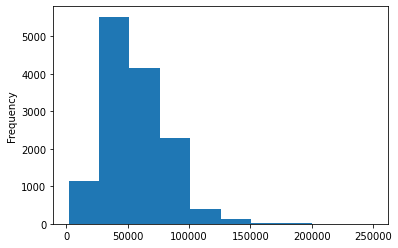

In [55]:
df["ANNUAL_RT"].plot(kind="hist")

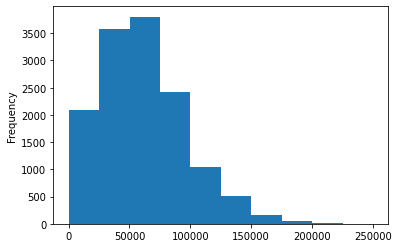

In [56]:
df["GROSS"].plot(kind="hist")

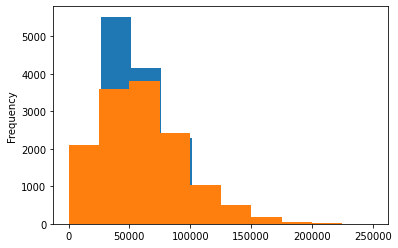

In [57]:
df["ANNUAL_RT"].plot(kind="hist")
df["GROSS"].plot(kind="hist")

### kde plot

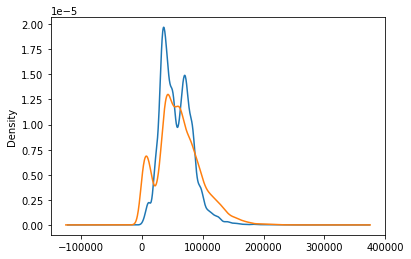

In [58]:
df["ANNUAL_RT"].plot(kind="kde")
df["GROSS"].plot(kind="kde")

## `HIRE_DT`

### analizando timestamp

#### Año com más contrataciones

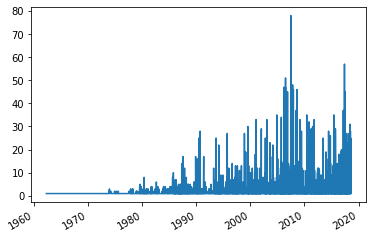

In [59]:
df["HIRE_DT"].value_counts().plot()

In [60]:
df["HIRE_DT_Y"] = df["HIRE_DT"].dt.year

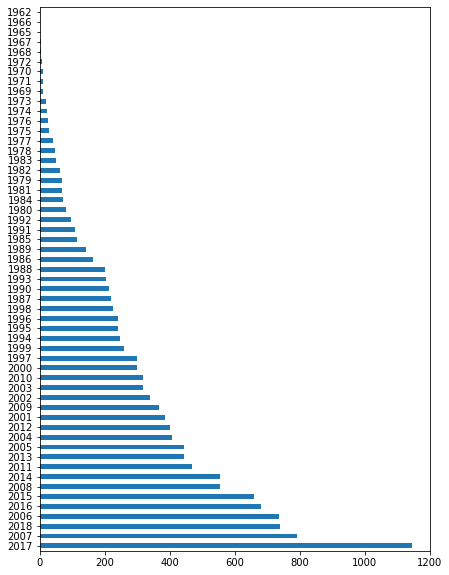

In [61]:
plt.figure(figsize=(7,10))
df["HIRE_DT_Y"].value_counts().plot(kind="barh")

#### mes com más contrataciones

In [62]:
df["HIRE_DT_M"] = df["HIRE_DT"].dt.month

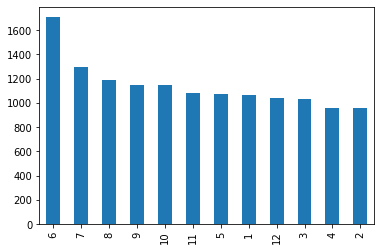

In [63]:
df["HIRE_DT_M"].value_counts().plot(kind="bar")

#### dia com más contrataciones

In [64]:
df["HIRE_DT_D"] = df["HIRE_DT"].dt.day

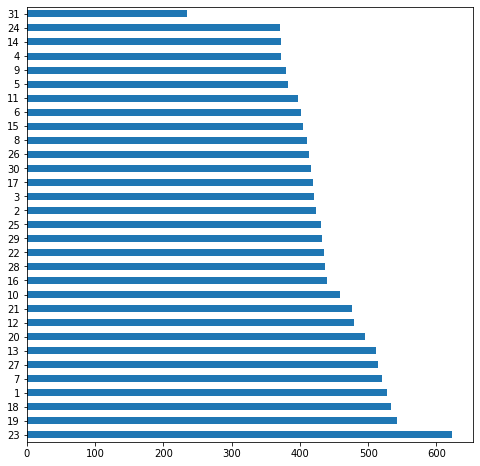

In [65]:
plt.figure(figsize=(8,8))
df["HIRE_DT_D"].value_counts().plot(kind="barh")

# **Data Preparation**

## `GROSS`

### extrayendo outliers

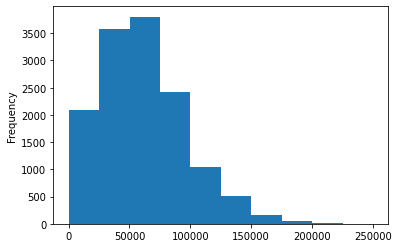

In [66]:
df["GROSS"].plot(kind="hist")

In [67]:
df.loc[is_outlier(df["GROSS"]),"GROSS"] = np.mean(df["GROSS"])

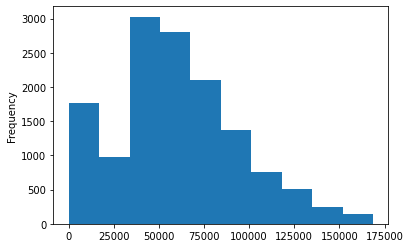

In [68]:
df["GROSS"].plot(kind="hist")

## `DESCR`

### extrayendo valores de un texto

#### posicional

In [69]:
df["DESCR"]

0             OED-Employment Dev (031)
1        States Attorneys Office (045)
2                   City Council (002)
3              Police Department (416)
4        States Attorneys Office (017)
                     ...              
13678             R&P-Recreation (009)
13679          Police Department (416)
13680          Police Department (006)
13681          Police Department (261)
13682     HLTH-Health Department (527)
Name: DESCR, Length: 13680, dtype: object

In [70]:
df["DESCR_ID"] = df["DESCR"].str[-4:-1]

In [71]:
df["DESCR_ID"].value_counts()

001    879
002    477
e)     330
004    306
003    282
      ... 
rar      1
349      1
374      1
381      1
197      1
Name: DESCR_ID, Length: 326, dtype: int64

#### regex

In [72]:
df["DESCR_ID"] = df["DESCR"].str.extract("\(([\w\d]+)\)$")

In [73]:
df["DESCR_ID"].value_counts()

001    879
002    477
004    306
003    282
786    230
      ... 
163      1
999      1
349      1
374      1
910      1
Name: DESCR_ID, Length: 315, dtype: int64

In [74]:
df["DESCR_COUNCIL_F"] = df["DESCR"].str.contains("Council")

In [75]:
df["DESCR_COUNCIL_F"].sum()/len(df["DESCR_COUNCIL_F"])

0.007090643274853801

## `NAME`

### data split

#### ¿Cuáles son las familias más comunes?

In [76]:
df["LAST_NAME"] = df.NAME.str.split(",").str[0]

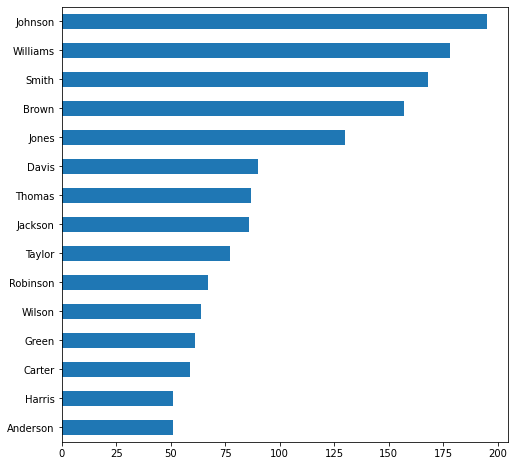

In [77]:
plt.figure(figsize=(8,8))
df["LAST_NAME"].value_counts().sort_values(ascending=True).tail(15).plot(kind="barh")

#### ¿Cuáles son las familias más poderosas?

In [78]:
df.groupby(["LAST_NAME"])["GROSS"].mean().sort_values(ascending=False).head(10)

LAST_NAME
Dyer           168079.12
Dease          167626.18
Kraus          167405.02
Harty          167287.69
Mayfield Sr    167240.45
Vetter         167018.30
Javed          166756.44
Alvarez III    166714.35
Golimowski     166093.50
Himes          165991.44
Name: GROSS, dtype: float64

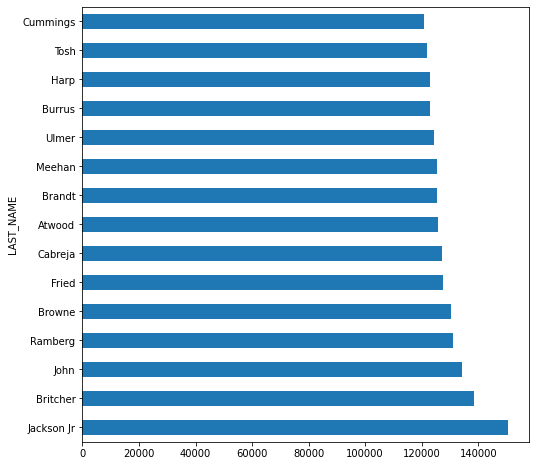

In [79]:
plt.figure(figsize=(8,8))
df.groupby(["LAST_NAME"]).agg({"GROSS":"mean", "ID":"count"}).query("ID > 1").sort_values("GROSS", ascending=False).head(15)["GROSS"].plot(kind="barh")

## `JOBTITLE`

En el mundo de las bases de datos, la cardinalidad se refiere al número de valores únicos contenidos en una columna o campo en particular de una base de datos.

En Data Science, este es uno de los problemas más comunes que encontramos (demasiados valores únicos).

https://medium.com/analytics-vidhya/how-handle-high-cardinality-d889ca61b6a6

### Dummy encoder (high cardinality)

- Dummy Encoder : Este método consiste en crear n nuevas variables de
{0, 1}. Este método no es muy práctico y el tiempo de procesamiento aumentará significativamente.

In [101]:
print(f"{(len(df.JOBTITLE.unique()))} valores unicos")

1012 valores unicos


In [80]:
df["JOBTITLE_ASSISTANT_F"] = df.JOBTITLE.str.contains("Assistant")

In [81]:
df["JOBTITLE_SUPPORT_F"] = df.JOBTITLE.str.contains("Support")

In [82]:
df["JOBTITLE_SHERIFF_F"] = df.JOBTITLE.str.contains("Sheriff")

In [83]:
df["JOBTITLE_INSPECTOR_F"] = df.JOBTITLE.str.contains("Inspector")

## `DEPTID`

### Dummy encoder `get_dummies()`

In [88]:
df["DEPTID_PREFIX"] = df.DEPTID.str[0]

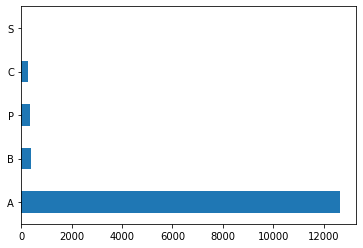

In [89]:
df["DEPTID_PREFIX"].value_counts().plot(kind="barh")

In [90]:
df_dummies = pd.get_dummies(df["DEPTID_PREFIX"], "DEPTID_PREFIX_")

In [91]:
df = pd.concat([df.reset_index(drop=True),df_dummies.reset_index(drop=True)], axis=1)